# Create a NetworkX street network from OpenStreetMap

In [1]:
import osmnx, networkx as nx
%matplotlib inline
osmnx.config(file_log=True, use_cache=True)

## Calculate the network path from the centermost node to some other node
Let the origin node be the node nearest the location and let the destination node just be the last node in the network. Then find the shortest path between origin and destination, using weight='length' to find the shortest spatial path (otherwise it treats each edge as weight=1).

In [2]:
# define a lat-long point, create network around point, define origin/destination nodes
location_point = (37.791427, -122.410018)
G = osmnx.graph_from_point(location_point, distance=500, distance_type='network', network_type='walk')
origin_node = osmnx.get_nearest_node(G, location_point)
destination_node = G.nodes()[-1]

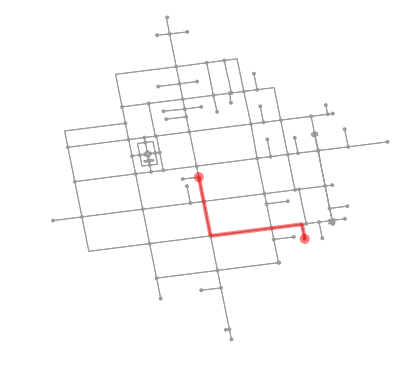

In [3]:
# find the route between these nodes then plot it
route = nx.shortest_path(G, origin_node, destination_node)
fig, ax = osmnx.plot_graph_route(G, route)

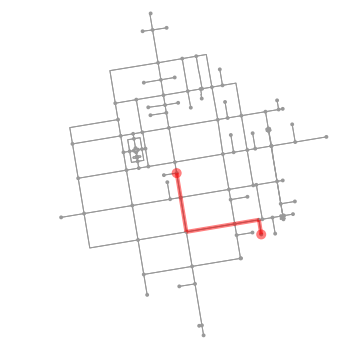

In [4]:
# project the network to UTM (zone calculated automatically) then plot the network/route again
G_proj = osmnx.project_graph(G)
fig, ax = osmnx.plot_graph_route(G_proj, route)

## Plot network path from one lat-long to another

In [5]:
# define origin/desination points then get the nodes nearest to each
origin_point = (37.792896, -122.412325)
destination_point = (37.790495, -122.408353)
origin_node = osmnx.get_nearest_node(G, origin_point)
destination_node = osmnx.get_nearest_node(G, destination_point)
origin_node, destination_node

(850803362, 65290756)

In [6]:
# find the shortest path between origin and destination nodes
route = nx.shortest_path(G, origin_node, destination_node, weight='length')
str(route)

'[850803362, 633686735, 633686762, 633686748, 633686743, 850803353, 65295320, 65295314, 65295311, 65332818, 65332815, 65319944, 65290756]'

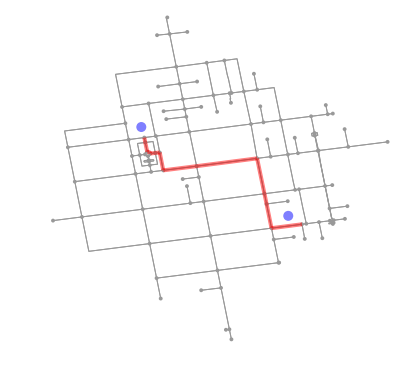

In [7]:
# plot the route showing origin/destination lat-long points in blue
fig, ax = osmnx.plot_graph_route(G, route, origin_point=origin_point, destination_point=destination_point)

## Demonstrate routing with one-way streets

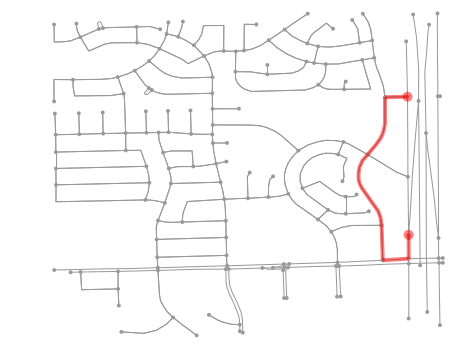

In [8]:
G = osmnx.graph_from_address('N. Corsica Pl., Chandler, Arizona', distance=800, network_type='drive')
origin = (33.307792, -111.894940)
destination = (33.312994, -111.894998)
origin_node = osmnx.get_nearest_node(G, origin)
destination_node = osmnx.get_nearest_node(G, destination)
route = nx.shortest_path(G, origin_node, destination_node)
fig, ax = osmnx.plot_graph_route(G, route, save=True, filename='route')

#### Also, when there are parallel edges between nodes in the route, osmnx picks the shortest edge to plot

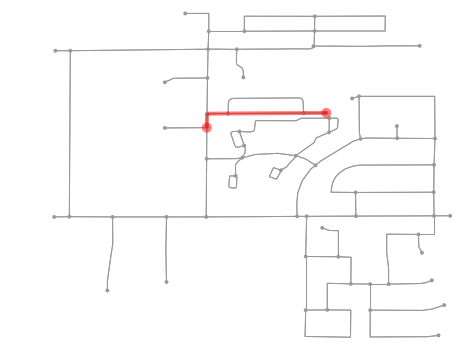

In [9]:
location_point = (33.299896, -111.831638)
G = osmnx.graph_from_point(location_point, distance=500)
origin = (33.301821, -111.829871)
destination = (33.301402, -111.833108)
origin_node = osmnx.get_nearest_node(G, origin)
destination_node = osmnx.get_nearest_node(G, destination)
route = nx.shortest_path(G, origin_node, destination_node)
fig, ax = osmnx.plot_graph_route(G, route)